In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [9]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


<Axes: xlabel='X', ylabel='Y'>

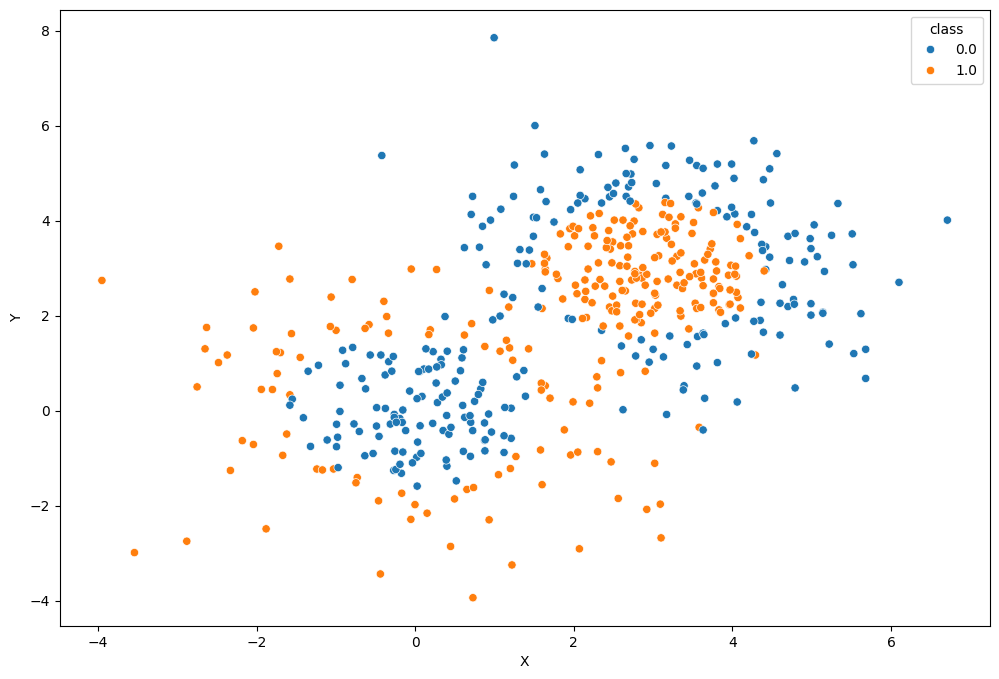

In [14]:
sns.scatterplot(data=circ, x="X", y="Y", hue="class")

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [13]:
from sklearn.linear_model import LogisticRegression

### Your code is here

model = LogisticRegression()
model.fit(circ[["X", "Y"]], circ["class"])


LogisticRegression()

In [23]:
model.score(circ[["X", "Y"]], circ["class"])

0.424

In [29]:
betta0 = model.intercept_[0]
betta1, betta2 = model.coef_[0][0], model.coef_[0][1]

x_vals = np.array([np.min(circ["X"]), np.max(circ["X"])])
y_vals = -(betta0 + betta1 * x_vals) / betta2

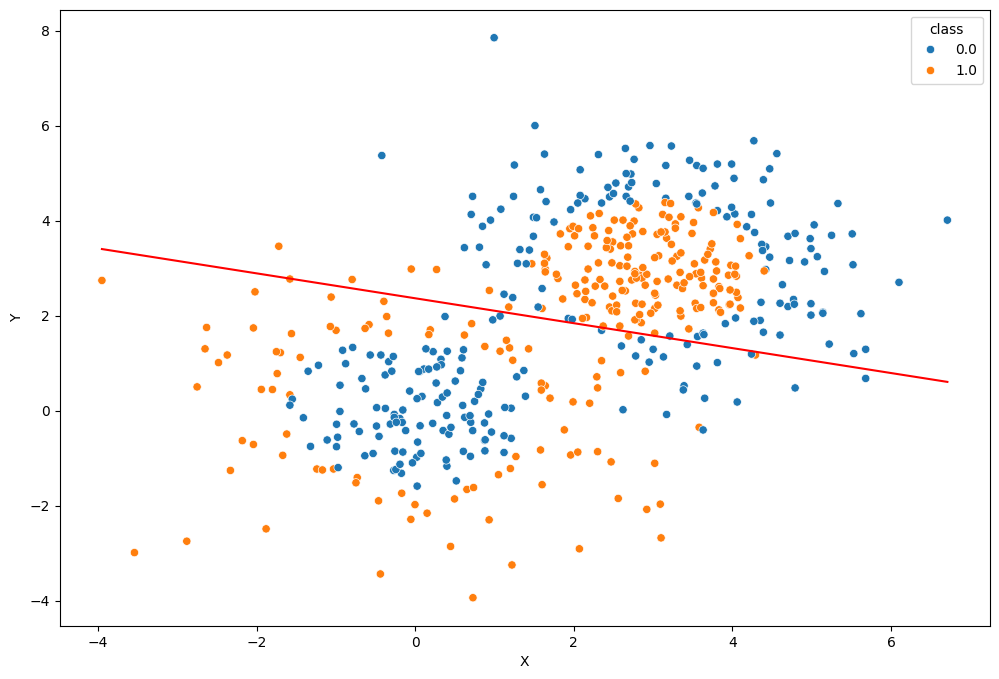

In [30]:
sns.scatterplot(data=circ, x="X", y="Y", hue="class")
sns.lineplot(x=x_vals, y=y_vals, color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(title="class")

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [34]:
X = circ[['X', 'Y']].values
Y = circ['class'].values.astype('int')

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                          shuffle=True,
                                                          random_state=2022)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

classifiers = []
### Your code is here
for k in all_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)

    classifiers.append(knn)
    train_acc = knn.score(X_train, Y_train)
    test_acc = knn.score(X_test, Y_test)

    print(f'k={k}, train acc={train_acc:.3f}, test acc={test_acc:.3f}')



k=1, train acc=1.000, test acc=0.890
k=3, train acc=0.948, test acc=0.870
k=10, train acc=0.915, test acc=0.850
k=30, train acc=0.853, test acc=0.740
k=40, train acc=0.800, test acc=0.750
k=60, train acc=0.693, test acc=0.730


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [ ]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [ ]:
### Your code is here




1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [37]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
X = df.drop('Surge_Pricing_Type', axis=1)
Y = df['Surge_Pricing_Type']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    shuffle=True, random_state=2022)

In [40]:
### Your code is here
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


all_k = [1, 5, 10]

pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", KNeighborsClassifier())])

model = KNeighborsClassifier()

for k in all_k:
    pipe.set_params(model__n_neighbors=k)
    pipe.fit(X_train, Y_train)

    test_acc = pipe.score(X_test, Y_test)
    print(f'k={k}, test acc scaler ={test_acc:.3f}')

    model.set_params(n_neighbors=k)
    model.fit(X_train, Y_train)

    test_acc = model.score(X_test, Y_test)
    print(f'k={k}, test acc no scaler ={test_acc:.3f}')


k=1, test acc scaler =0.565
k=1, test acc no scaler =0.438
k=5, test acc scaler =0.630
k=5, test acc no scaler =0.443
k=10, test acc scaler =0.661
k=10, test acc no scaler =0.470


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [43]:
### Your code is here

pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", KNeighborsClassifier(metric='minkowski', p=1, n_neighbors=10))])

pipe.fit(X_train, Y_train)
print(f"Test accuracy p=1: {pipe.score(X_test, Y_test):.2f}")

Test accuracy p=1: 0.66


ч**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [44]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [49]:
Y.unique()

array([452600., 358500., 352100., ..., 425800., 200700.,  47000.],
      shape=(3842,))

<Axes: xlabel='longitude', ylabel='latitude'>

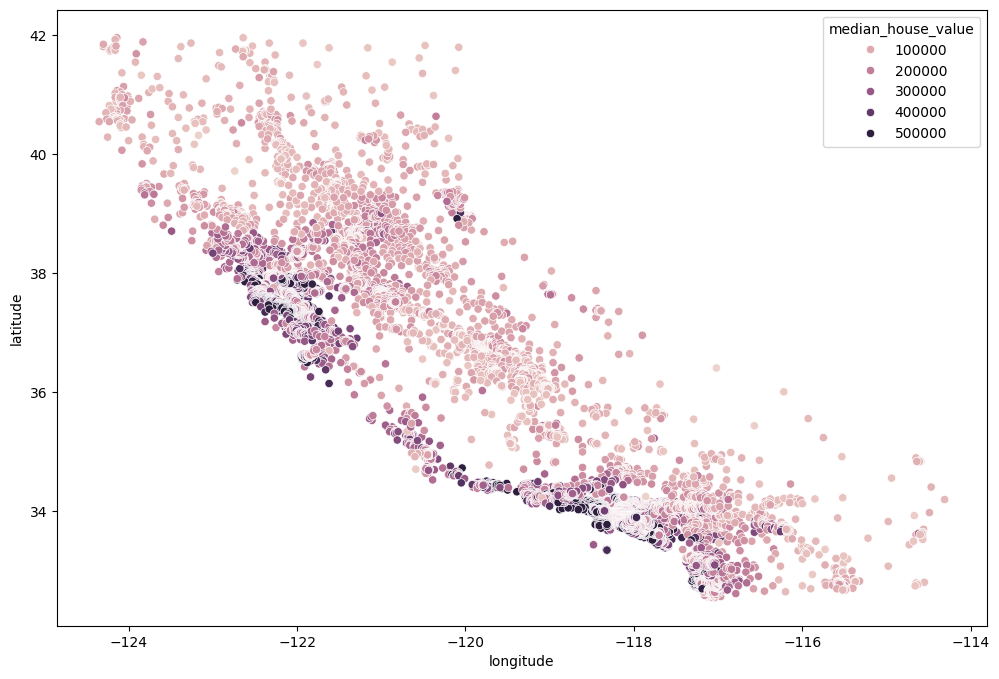

In [63]:
X = df[['longitude', 'latitude']]
Y = df['median_house_value']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                          shuffle=True,
                                                          random_state=2022)

sns.scatterplot(data=X, x="longitude", y="latitude", hue=Y)

In [64]:
### Your code is here
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

lr = LinearRegression()

lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

print(mean_squared_error(Y_test, y_pred)**0.5)


98369.877096577


In [65]:
params = {"model__n_neighbors": list(range(1, 10))}
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", KNeighborsRegressor())])

search = GridSearchCV(pipe, params)
search.fit(X, y)

y_pred = search.predict(X_test)

print(mean_squared_error(y_test, y_pred)**0.5)
print(search.best_params_)

46045.309006346455
{'model__n_neighbors': 9}


In [66]:
def kernel(distances, h=0.1):
    const = 1 / (np.sqrt(2 * np.pi))
    power = (-1 / 2) * (distances ** 2) / h ** 2
    return const * np.exp(power)

In [69]:
from sklearn.neighbors import KernelDensity


params = {"model__bandwidth": list(np.arange(0.02, 0.1, 0.01))}
pipe_2 = Pipeline([("scaler", StandardScaler()),
                   ("model", KernelDensity())])

search_2 = GridSearchCV(pipe_2, params)
search_2.fit(X, Y)

print(search_2.best_params_)

{'model__bandwidth': np.float64(0.09)}


In [70]:
pipe_3 = Pipeline([("scaler", StandardScaler()),
                   ("model", KNeighborsRegressor(n_neighbors=9, weights=kernel))])

pipe_3.fit(X_train, Y_train)

y_pred = pipe_3.predict(X_test)

print(mean_squared_error(y_test, y_pred)**0.5)

52857.73248502162
